In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
from sko.GA import GA_TSP
# 设置matplotlib以正确显示中文，避免乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 1. 加载城市坐标数据
points_coordinate = pd.read_csv('data.csv', header=None).values

# 2. 计算城市间的距离矩阵
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
print("距离矩阵的前5行5列:\n", distance_matrix[:5, :5])


距离矩阵的前5行5列:
 [[ 0.          1.08245092 10.04442134 14.32184695 27.23279273]
 [ 1.08245092  0.          8.99369223 14.30549545 27.65128749]
 [10.04442134  8.99369223  0.         15.02865596 30.39571351]
 [14.32184695 14.30549545 15.02865596  0.         15.43467849]
 [27.23279273 27.65128749 30.39571351 15.43467849  0.        ]]


## 实验一 遗传算法求解旅行商问题（TSP）
● 内容描述：
你将扮演一位物流规划师，任务是为遍布全国的34个主要城市找到一条总距离最短的配送路线。由于该问题的计算复杂度极高，你将利用从生物进化中汲取灵感的“遗传算法”，在海量的可能性中智能地搜索近似最优解，并最终将你找到的路线在真实地图上进行可视化展示。

● 实验要求与操作步骤：
请直接运行以下完整的代码，观察并记录初始结果。然后，根据思考题的指引，修改代码中 GA_TSP(...) 里的参数值并重新运行，以完成实验并回答问题。

- 思考题：


#### **问题1：** 使用默认参数，连续运行程序两次，得到的最优路线和总距离完全一样吗？为什么会（或不会）出现这种情况？这说明了遗传算法的什么特性？

**参考答案：**
大概率**不一样**。

**原因：**
遗传算法是一个**随机**或称**启发式**算法，它在多个关键步骤中都引入了随机性：
1.  **初始种群的生成：** 第一次运行时，初始的50条路线是随机生成的；第二次运行时，生成的又是另一组完全不同的随机路线。起点就不同。
2.  **选择过程：** 在“优胜劣汰”时，通常不是只有最好的个体被选中，而是越好的个体被选中的**概率**越高，这其中仍有随机因素。
3.  **交叉过程：** 两个父代个体具体从哪里开始“交换基因”（交叉点），通常也是随机选择的。
4.  **变异过程：** 哪个个体的哪个基因（城市）会发生变异，完全是基于一个很小的随机概率。

**说明的特性：**
这说明遗传算法不保证每次都能找到完全相同的解，更不保证能找到理论上的“唯一最优解”。它的核心特性是**在巨大的搜索空间中，通过模拟进化的方式，高效地找到一个足够好的、接近最优的“满意解”**。对于TSP这样的NP-Hard问题，追求在有限时间内找到一个高质量的满意解，比追求一个无法算出的绝对最优解更有实际意义。

---

#### **问题2：** 【探索种群大小】 在“控制变量法”的指导下，保持其他参数不变，只改变 `size_pop` 参数，分别设为 `10` 和 `200` 并运行。你观察到了什么现象？更大的种群对结果质量（总距离）和运行效率（花费时间）有什么影响？

**参考答案：**

**观察到的现象：**
* 当 `size_pop = 10` 时，程序运行得非常快，但找到的路线总距离通常比较长（结果质量较差）。
* 当 `size_pop = 200` 时，程序运行得明显变慢，但最终找到的路线总距离通常会比默认参数和 `size_pop=10` 时更短（结果质量更高）。

**影响分析：**
种群大小（`size_pop`）是**搜索广度**和**计算成本**之间的一个权衡。

* **对结果质量的影响：**
    * 更大的种群意味着**更高的“生物多样性”**。算法在一开始就有了更多种类、差异更大的路线方案。这使得算法有更多的“基因素材”可以通过交叉来组合，从而更容易发现优秀的路线片段，**避免过早地陷入局部最优解**，因此找到的最终解的质量通常更高。
    * 反之，小种群多样性差，可能整个种群的“基因”都很相似，很快就找不到更好的组合了，导致结果不佳。

* **对运行效率的影响：**
    * 更大的种群意味着**每一代需要评估的个体更多**，计算量成倍增加，因此算法运行的时间会显著变长。

**结论：**
通常来说，更大的种群能带来更好的求解质量，但代价是消耗更多的计算时间。在实际应用中，需要根据问题的复杂性和可接受的计算时间来选择一个合适的种群大小。

---

#### **问题3：** 【探索变异概率】 恢复默认参数，只改变 `prob_mut` 参数，分别设为 `0.001` (极低) 和 `0.5` (极高) 并运行。你认为变异概率在算法中扮演了什么样的“角色”？过高或过低的变异率分别可能导致什么问题？

**参考答案：**

**变异概率的角色：**
变异在遗传算法中扮演着**“探索者”**和**“搅局者”**的角色。它的核心作用是**维持种群的多样性**，并有机会**跳出局部最优解**。当所有个体通过交叉变得越来越相似，陷入一个“还不错”但不是最好的解决方案时，一个偶然的变异可能会突然创造出一个全新的、更有潜力的个体，为进化指引新的方向。

**影响分析：**
* **过低的变异率 (如 `0.001`):**
    * **问题：** 算法可能**过早收敛（premature convergence）**。种群会很快失去多样性，所有个体都变得非常相似。一旦陷入一个局部最优解的“山谷”，由于缺乏变异带来的“跳跃”能力，算法很难再爬出来去寻找全局最优的“山峰”，导致最终结果不佳。
* **过高的变异率 (如 `0.5`):**
    * **问题：** 算法**难以收敛**，几乎退化为随机搜索。父代通过交叉好不容易遗传给子代的优秀“基因片段”（好的局部路线）会被频繁的变异所破坏。算法无法稳定地保留和积累优秀的解决方案，导致搜索过程非常盲目，最终结果通常也很差。

**结论：**
变异率是一个非常敏感且重要的参数。它必须足够大，以保证种群不会失去活力；但又必须足够小，以免破坏算法通过交叉学习到的优秀模式。在实践中，通常会选择一个很小的值（如 `0.01` 到 `0.1` 之间）。


In [2]:
# --- 2. 定义适应度函数 (代码已完成) ---
def cal_total_distance(routine):
    '''
    计算一条TSP路线的总距离。
    这个函数是遗传算法的“适应度函数”，用于评估每一条路线（染色体）的好坏。
    :param routine: 一个一维numpy数组，代表城市的访问顺序，例如 [0, 2, 1, 3]。
    :return: 该路线的总距离（一个浮点数）。
    '''
    # 从输入路线数组的形状中解包，获取点的数量（城市数量）
    # routine.shape 是一个元组，例如 (34,)，通过 num_points, = 的方式可以直接获取第一个元素
    num_points, = routine.shape
    
    # 初始化总距离为0
    total_distance = 0
    
    # 使用循环计算从第一个城市到倒数第二个城市的路径总和
    # range(num_points - 1) 会生成一个从 0 到 num_points-2 的序列
    for i in range(num_points - 1):
        # routine[i] 是当前城市的索引, routine[i + 1] 是下一个城市的索引
        # distance_matrix 是一个预先计算好的矩阵，存储了任意两个城市间的直接距离
        # 我们从矩阵中查找出这两个城市间的距离，并累加到总距离上
        total_distance += distance_matrix[routine[i], routine[i + 1]]
    
    # 关键一步：加上从最后一个城市回到第一个城市的距离，完成闭环
    # routine[-1] 代表路线中的最后一个城市
    # routine[0] 代表路线中的第一个城市（起点）
    total_distance += distance_matrix[routine[-1], routine[0]]
    
    # 返回最终计算出的总距离
    return total_distance

In [3]:
# 参数提示: func=适应度函数, n_dim=城市数量, size_pop=种群大小, max_iter=最大迭代次数, prob_mut=变异概率
#  修改这里的参数
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=34, size_pop=100, max_iter=5000, prob_mut=0.01)

# 4. 运行算法
best_points, best_distance = ga_tsp.run()
print("找到的最优路线:", best_points)
print("最短总距离:", best_distance)


找到的最优路线: [16 15  1 11 10  9  0 12 13  7  6 27 14  5  4 29  3 30 31  8 26 33 32 24
 21 20 25 19  2 17 18 23 22 28]
最短总距离: [159.4138991]


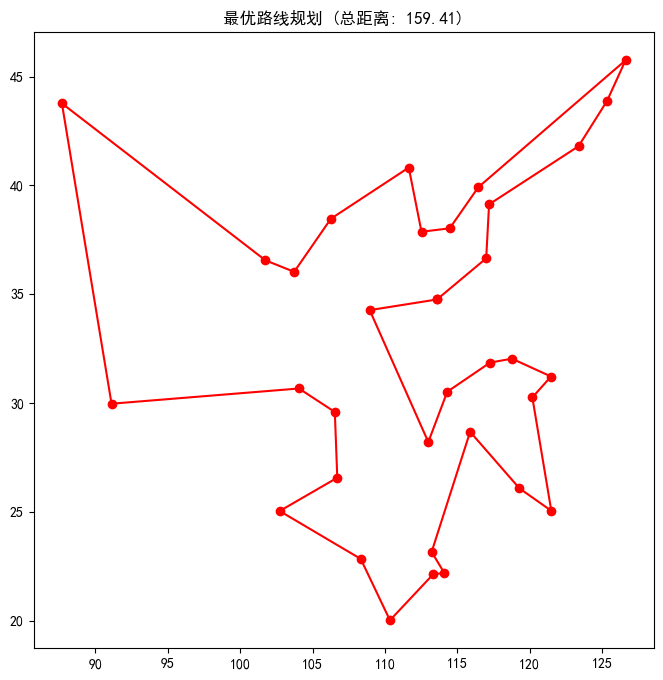

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax.set_title(f'最优路线规划 (总距离: {best_distance[0]:.2f})')
ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
plt.show()


## 实验 二
● 内容描述：
你的任务是试图找到复杂地形“最低谷”。你将使用模拟“鸟群觅食”行为的粒子群算法（PSO），在给定的数学函数（地形图）上，智能地搜索其全局最小值点。

● 实验要求与操作步骤：

- 步骤一：通过交互式动画建立直观理解

- 在编写代码之前，请先打开老师提供的 pso_demo.html 文件。这是一个粒子群算法的动态演示。请尝试拖动 w (惯性权重), c1 (自我认知), c2 (社会经验) 的滑块，并观察图中“焦点粒子”（红色）身上的彩色箭头如何变化。思考这些参数是如何影响粒子飞行的。

- 步骤二：运行代码并进行参数探索

在理解了参数的直观作用后，我们将在Python代码中验证我们的观察。请先运行以下完整代码，然后根据思考题的指引进行参数调整。

 思考题：

#### **问题1：** 【探索惯性权重】 结合 `pso_demo.html` 中的观察，描述参数 `w` (惯性权重) 的作用。在Python代码中，分别设置一个较大的 `w` (如 `1.1`) 和一个较小的 `w` (如 `0.4`)，运行后观察收敛曲线图有何不同？哪种情况收敛更快？哪种情况的最终结果可能更好（更接近理论最小值0）？

**参考答案：**

**`w` (惯性权重) 的作用：**
`w` 参数控制了粒子保持其自身飞行速度的倾向，是**全局探索（Exploration）**和**局部开采（Exploitation）**之间的平衡器。
* 在 `pso_demo.html` 中，`w` 对应着蓝色惯性箭头的长度。
* **较大的 `w`** 意味着粒子倾向于保持当前的速度和方向，这使得它有能力飞越当前的区域，去探索更广阔、未知的搜索空间（**增强了全局探索能力**）。
* **较小的 `w`** 意味着粒子会很快“减速”，更容易受到自身历史最优和群体最优位置的引力影响，从而在已发现的较优区域内进行更精细的搜索（**增强了局部开采能力**）。

**实验观察与分析：**
* **当 `w` 较小 (如 `0.4`) 时：**
    * **收敛曲线：** 曲线在初期会**下降得非常快**，表现为**收敛速度快**。
    * **分析：** 粒子群很快就聚集到了初始发现的某个较优区域。但这也带来了巨大的风险，因为如果这个区域只是一个局部最优解的“小土坑”，整个粒子群可能会因为惯性太小而**难以“飞”出来**，从而错过了全局最优解。
* **当 `w` 较大 (如 `1.1`) 时：**
    * **收敛曲线：** 曲线下降得**比较平缓**，甚至可能在某些阶段有所震荡，表现为**收敛速度慢**。
    * **分析：** 粒子因为惯性大，探索范围广，不会轻易地停留在某一个点。这使得算法有更大的机会“飞越”局部最优的陷阱，最终找到全局最优解。因此，虽然收敛慢，但**最终结果可能更好**（函数值更接近0）。

**结论：** 较小的`w`收敛更快，但容易陷入局部最优；较大的`w`收敛更慢，但全局搜索能力更强，更有可能找到高质量的解。

---

#### **问题2：** 【探索学习因子】 同样地，结合HTML动画，描述 `c1` (自我认知) 和 `c2` (社会经验) 的作用。请设计一组实验（例如，一组 `c1=2.0, c2=0.1`，另一组 `c1=0.1, c2=2.0`），在Python代码中运行并观察结果。这两种“极端”的设置分别对粒子群的搜索行为（收敛速度、最终结果）造成了什么影响？

**参考答案：**

**`c1` 和 `c2` 的作用：**
这两个参数分别代表了粒子在决策时，对“自我历史经验”和“群体社会智慧”的信任程度。
* **`c1` (自我认知)：** 控制粒子飞向**自己历史到过的最好位置**的倾向。在动画中对应绿色箭头。`c1` 越大，粒子越“固执”，更相信自己的判断。
* **`c2` (社会经验)：** 控制粒子飞向**整个群体当前找到的最好位置**的倾向。在动画中对应紫色箭头。`c2` 越大，粒子越喜欢“随大流”，更倾向于跟随“领头鸟”。

**实验观察与分析：**
* **当 `c1=2.0, c2=0.1` 时（“固执的个体主义者”）：**
    * **影响：** 粒子群的收敛速度会**非常缓慢**。因为每个粒子都主要被自己找到的最好点吸引，而不太关心同伴的发现。粒子群会分散地在各自认为好的区域进行搜索，缺乏有效的协作和信息共享。整个群体就像一盘散沙，难以形成合力。
* **当 `c1=0.1, c2=2.0` 时（“盲从的集体主义者”）：**
    * **影响：** 粒子群的收敛速度会**非常快**。一旦某个粒子偶然发现了一个还不错的点，强大的`c2`引力会迅速将整个群体都吸引过去。但这非常危险，因为如果第一个被发现的“好点”只是一个局部最优解，那么整个群体会迅速聚集于此，**过早收敛**，完全丧失了探索其他区域的可能性，很难找到全局最优解。

**结论：** `c1` 和 `c2` 的平衡至关重要。过分强调“自我”会导致搜索效率低下；而过分强调“社会”则容易导致整个群体陷入“信息茧房”，失去发现更优解的机会。一个健康的粒子群，需要在个体探索和群体信息共享之间取得动态平衡。

--- 正在绘制目标函数的三维图像 ---


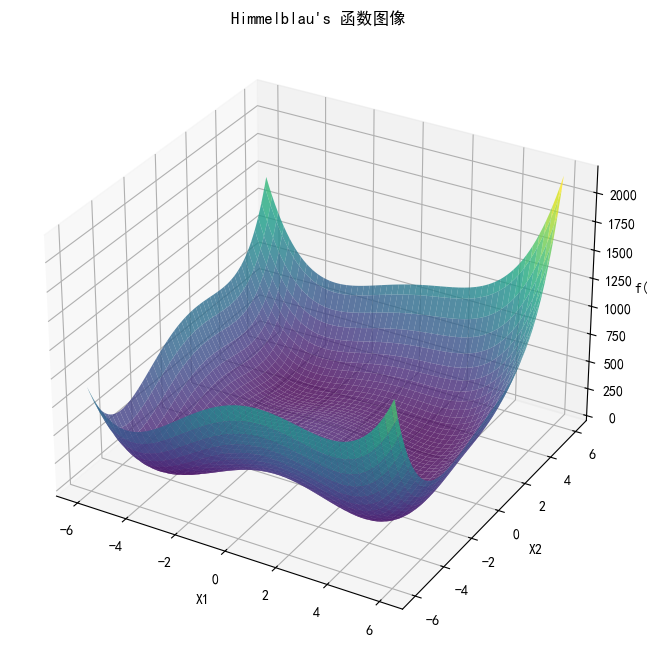


--- 开始运行粒子群算法求解函数极值 ---
最优位置: [-2.80511489  3.131314  ]
最小函数值: [4.25525691e-10]


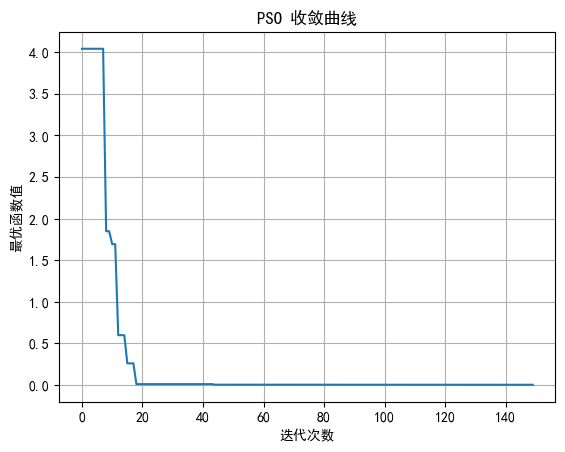

In [5]:
# 导入需要的库
from sko.PSO import PSO
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# --- 1. 定义一个通用的二元函数绘图方法 (代码已完成) ---
def plot_2d_function(func, x_range=(-6, 6), y_range=(-6, 6), title="函数图像"):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func([X[i, j], Y[i, j]])
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_zlabel('f(x)')
    plt.show()

# --- 2. 定义目标函数 (代码已完成) ---
def objective_function(x):
    x1, x2 = x
    # Himmelblau's函数，它有4个相同的最小值点
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

# --- 3. 可视化目标函数 (代码已完成) ---
print("--- 正在绘制目标函数的三维图像 ---")
plot_2d_function(objective_function, title="Himmelblau's 函数图像")

# --- 4. 配置并运行粒子群算法 ---
print("\n--- 开始运行粒子群算法求解函数极值 ---")

# 核心操作区域：请在这里修改参数以进行实验
pso = PSO(func=objective_function, dim=2, pop=50, max_iter=150, lb=[-6, -6], ub=[6, 6], w=0.8, c1=0.1, c2=2.0)

# 运行算法，然后从对象属性中获取结果
pso.run()
best_position = pso.gbest_x
best_value = pso.gbest_y

print('最优位置:', best_position)
print('最小函数值:', best_value)

# --- 5. 可视化收敛过程 (代码已完成) ---
plt.figure()
plt.title("PSO 收敛曲线")
plt.xlabel("迭代次数")
plt.ylabel("最优函数值")
plt.plot(pso.gbest_y_hist)
plt.grid(True)
plt.show()
